# Milestone 2

## Provide a summary of the different descriptive statistics you looked at and WHY.

I started to compute each question in python code in order to graphically appreciate the development of the virus. 

1. When did covirus cases start growing at an accelerated rate?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

data = pd.read_csv('../us-counties-2020.csv')
states = ['California', 'New York', 'Washington', 'Florida']
clean_data = data[data['state'].isin(states)].copy()

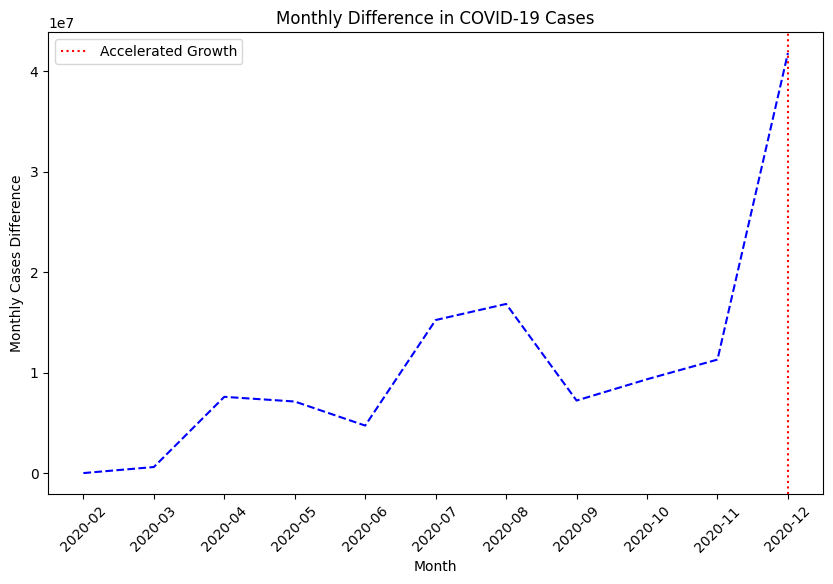

In [42]:
# Convert 'date' column to datetime format
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Group the data by month and calculate the total cases for each month
cases_per_month = clean_data.groupby(clean_data['date'].dt.to_period('M'))['cases'].sum()

# Compute the monthly difference in cases
monthly_cases_diff = cases_per_month.diff()

# Find the month when cases started growing at an accelerated rate
accelerated_growth_month = monthly_cases_diff.idxmax()
accelerated_growth_month_str = str(accelerated_growth_month)

# Convert Period index to string format for plotting
monthly_cases_diff.index = monthly_cases_diff.index.astype(str)

# Plot the monthly difference in cases
plt.figure(figsize=(10, 6))
plt.plot(monthly_cases_diff.index, monthly_cases_diff.values, color='blue', linestyle='dashed')
plt.axvline(accelerated_growth_month_str, color='red', linestyle='dotted', label='Accelerated Growth')
plt.title('Monthly Difference in COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Monthly Cases Difference')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Based on the analysis of the monthly difference in COVID-19 cases, it is evident that the growth of cases is not following a steady pattern. Instead, we observe fluctuations and periods of partial COVID-19 management or even a gradual decline in cases. 

Prior to February, there was a continuous increase in COVID-19 cases, indicating a rapid spread of the virus during that period. However, starting from February, the growth rate of cases started to fluctuate, with periods of acceleration followed by periods of depreciation.

Notably, the peaks in COVID-19 cases occurred in March, June, and November. Interestingly, after each peak, there was a subsequent decline in the number of cases within a period of one to two months. This suggests that measures taken to control the spread of the virus, such as lockdowns, social distancing, and increased testing, were effective in reducing the number of new infections.

These findings highlight the importance of implementing timely interventions to mitigate the spread of COVID-19. The observed fluctuations in case growth emphasize the need for continued vigilance and adherence to preventive measures even during periods of relatively lower case numbers. By closely monitoring the trends in COVID-19 cases and implementing appropriate measures, we can work towards managing and controlling the impact of the pandemic more effectively.

2. Were the sectors near the counties with the highest covid cases affected by these?

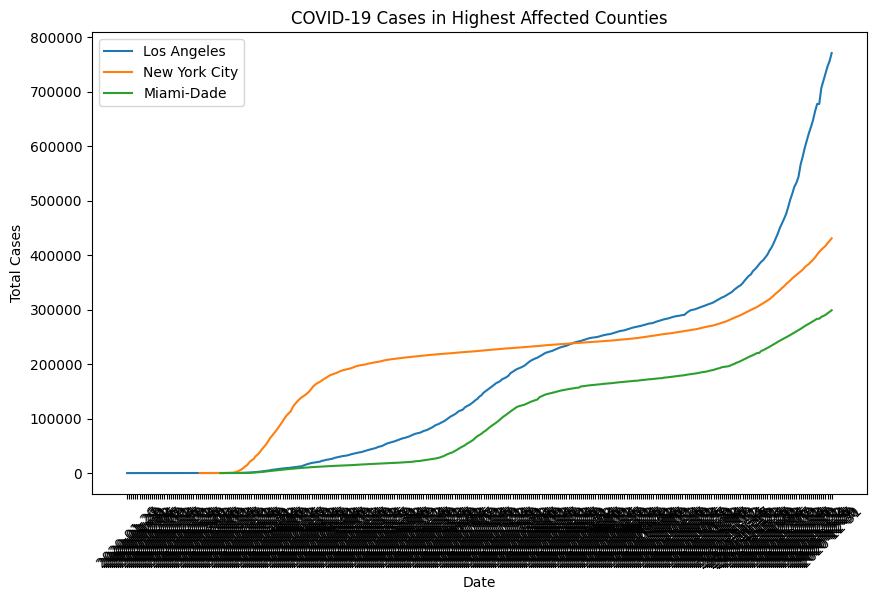

In [36]:
county_cases = clean_data.groupby('county')['cases'].max().sort_values(ascending=False)
highest_counties = county_cases.head(3)  # Select the top 3 counties with the highest cases

plt.figure(figsize=(10, 6))
for county in highest_counties.index:
    county_data = clean_data[clean_data['county'] == county]
    plt.plot(county_data['date'], county_data['cases'], label=county)

plt.title('COVID-19 Cases in Highest Affected Counties')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [37]:
'''
  With this data, we can see that the states of California, 
  New York and Florida have the counties with the most cases.

  Now we can calculate if nearby counties were affected as well.
'''

california_counties = clean_data[clean_data['state'] == 'California']['county'].unique()
new_york_counties = clean_data[clean_data['state'] == 'New York']['county'].unique()
florida_counties = clean_data[clean_data['state'] == 'Florida']['county'].unique()

# California counties nearby Los Angeles
california_nearby_counties = ['Los Angeles','Orange', 'Ventura', 'San Bernardino', 'Riverside', 'Kern']
# New York counties nearby New York City
new_york_nearby_counties = ['New York City','Kings', 'Queens', 'Bronx', 'Richmond', 'Westchester', 'Nassau', 'Suffolk']
# Florida counties nearby Miami-Dade
florida_nearby_counties = ['Miami-Dade','Broward', 'Palm Beach', 'Monroe']




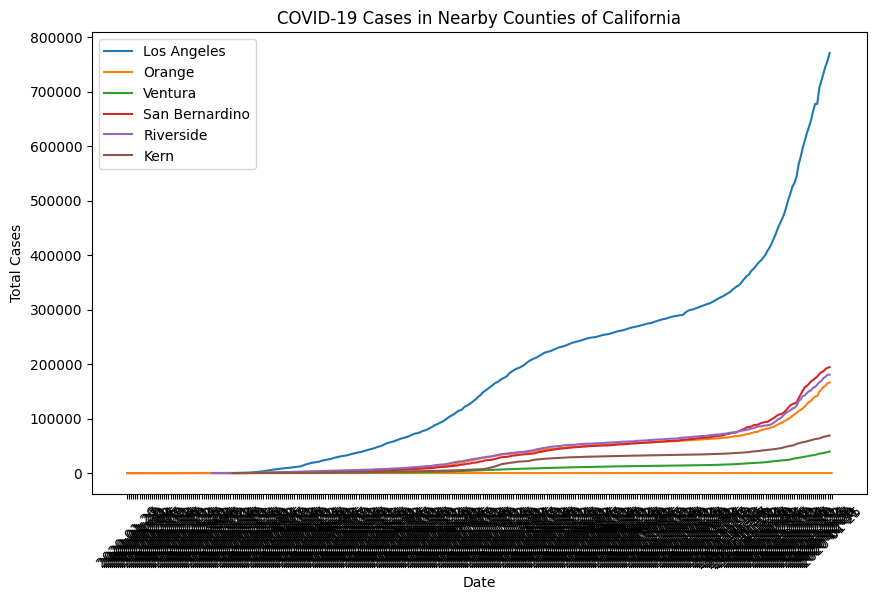

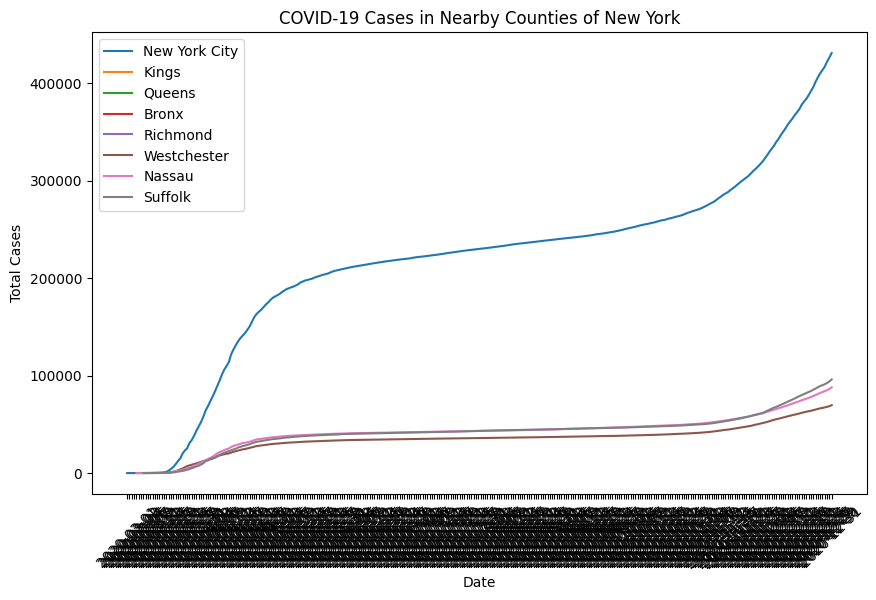

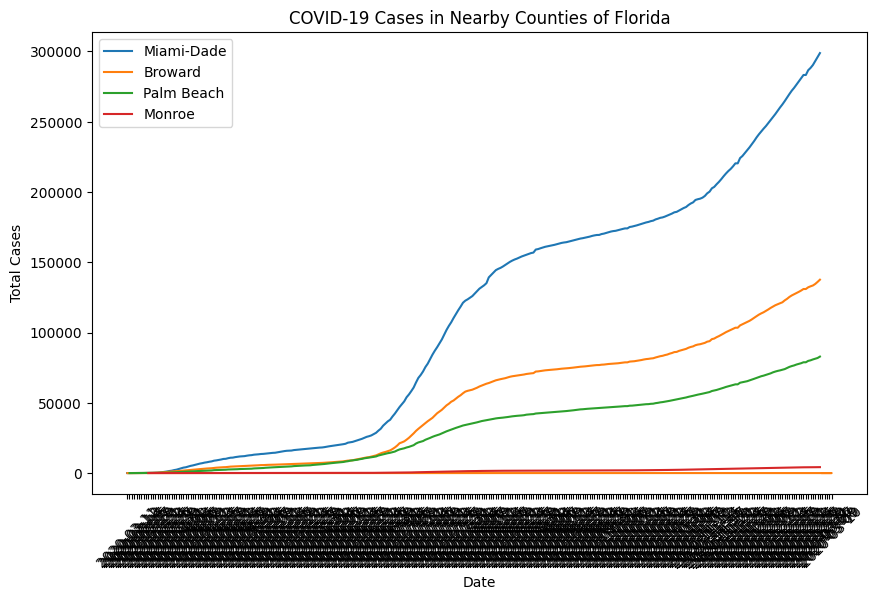

In [38]:
# Plotting nearby counties in California
plt.figure(figsize=(10, 6))
for county in california_nearby_counties:
    county_data = clean_data[(clean_data['state'] == 'California') & (clean_data['county'] == county)]
    plt.plot(county_data['date'], county_data['cases'], label=county)

plt.title('COVID-19 Cases in Nearby Counties of California')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting nearby counties in New York
plt.figure(figsize=(10, 6))
for county in new_york_nearby_counties:
    county_data = clean_data[(clean_data['state'] == 'New York') & (clean_data['county'] == county)]
    plt.plot(county_data['date'], county_data['cases'], label=county)

plt.title('COVID-19 Cases in Nearby Counties of New York')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting nearby counties in Florida
plt.figure(figsize=(10, 6))
for county in florida_nearby_counties:
    county_data = clean_data[(clean_data['state'] == 'Florida') & (clean_data['county'] == county)]
    plt.plot(county_data['date'], county_data['cases'], label=county)

plt.title('COVID-19 Cases in Nearby Counties of Florida')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Analysis: Impact of COVID-19 Cases in Nearby Counties**

The analysis focused on assessing the impact of COVID-19 cases in nearby counties of Los Angeles, New York City, and Florida. The findings reveal interesting patterns and variations among these regions.

In the case of Los Angeles, none of the counties near Los Angeles demonstrated COVID-19 case numbers as high as Los Angeles itself. Although there were temporal similarities in terms of peaks or spikes in cases, it can be concluded that the neighboring counties were not significantly affected by the high COVID-19 case count observed in Los Angeles. This suggests that there might have been distinct factors influencing the spread of the virus in Los Angeles compared to its neighboring counties.

Similarly, the analysis of New York City and its nearby counties indicated that the counties in close proximity did not experience the same level of impact from COVID-19 cases as New York City. The curves representing the nearby counties demonstrated a clear divergence from the trajectory of New York City's cases. This suggests that the containment measures and dynamics of the virus transmission may have differed between New York City and its neighboring regions.

In contrast, the analysis of Florida, specifically focusing on Miami-Dade and its nearby counties, revealed a notable influence of Miami-Dade's COVID-19 cases on the surrounding areas. The peaks or spikes in cases were observed to be shared among the counties in close proximity to Miami-Dade. This suggests a closer interconnectedness and potential transmission dynamics between Miami-Dade and its neighboring counties, resulting in similar patterns of COVID-19 cases.

Overall, these findings highlight the importance of considering the specific dynamics and geographical factors when examining the impact of COVID-19 cases in nearby counties. The varying patterns observed in different regions emphasize the need for tailored strategies and localized interventions to effectively mitigate the spread of the virus and protect public health.

3. Did the most affected counties manage to stabilize infections?

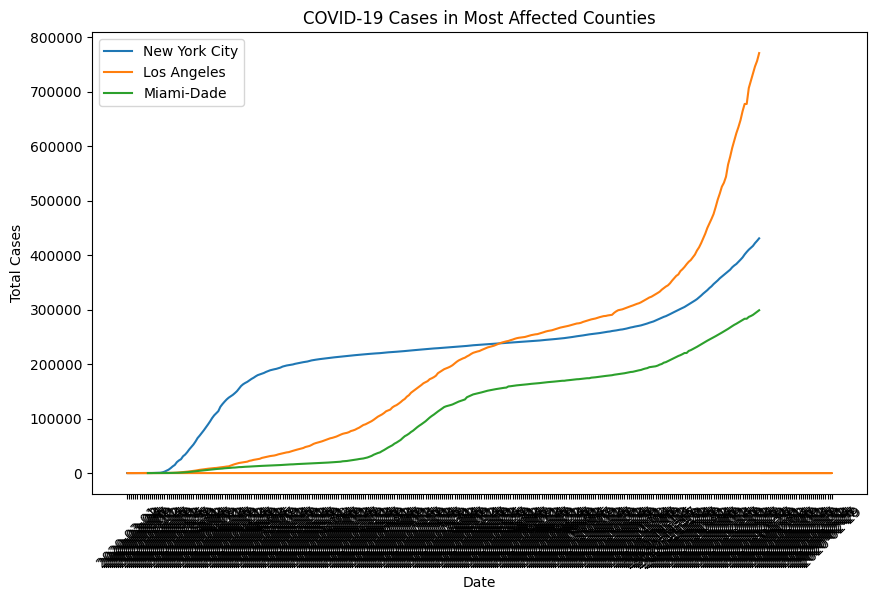

In [45]:
county_cases = clean_data.groupby('county')['cases'].sum().sort_values(ascending=False)
most_affected_counties = county_cases.head(3)  # Select the top 5 counties with the highest total cases
plt.figure(figsize=(10, 6))
for county in most_affected_counties.index:
    county_data = clean_data[clean_data['county'] == county]
    plt.plot(county_data['date'], county_data['cases'], label=county)

plt.title('COVID-19 Cases in Most Affected Counties')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Based on the analysis of the COVID-19 data, we observed distinct patterns in the number of cases in New York City, Los Angeles, and Miami-Dade counties. In the case of New York City, it experienced a high number of cases in the initial stages of the pandemic. However, the city was able to effectively contain the spread of the virus for a considerable period, roughly from April to October. This suggests that the stringent measures and interventions implemented in New York City during that time were successful in curbing the transmission of COVID-19.

In contrast, Los Angeles and Miami-Dade counties exhibited a different trend. These counties continued to experience increasing numbers of COVID-19 cases, with evident peaks or rises in cases. Unlike New York City, there was no apparent control or indication of a pause or decline in reported cases on a daily basis in these counties. This suggests that the measures implemented in these regions were not as effective in managing the spread of the virus, leading to sustained transmission and a lack of control over the case numbers.

The observed trends highlight the importance of implementing and maintaining robust public health measures to control the spread of COVID-19. The success seen in New York City demonstrates the effectiveness of proactive measures in containing the virus, while the ongoing challenges in Los Angeles and Miami-Dade counties underscore the need for continued efforts to control the transmission and protect public health.

It is crucial for policymakers and health authorities to closely monitor the situation and adjust strategies accordingly, especially in regions experiencing sustained increases in cases. By learning from the successes and challenges observed in different areas, we can improve our response to the pandemic and work towards mitigating its impact on communities and healthcare systems.

## Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?

1. The analysis of monthly differences in COVID-19 cases revealed that the growth of cases is not linear or consistent. Instead, there are fluctuations and periods of partial management or decline in cases, indicating the influence of various factors and interventions in controlling the spread of the virus.

2. The examination of the impact of COVID-19 cases in nearby counties demonstrated varying dynamics among different regions. While some neighboring counties showed temporal similarities in case spikes, others were not significantly affected by the high case numbers observed in the focal county. This suggests the presence of distinct factors influencing virus transmission in different areas.

3. The comparison of COVID-19 trends in New York City, Los Angeles, and Miami-Dade counties highlighted the success of stringent measures in New York City in containing the virus during a specific period. In contrast, Los Angeles and Miami-Dade counties experienced sustained increases in cases without clear indications of control or decline. This emphasizes the need for effective and tailored interventions to manage the spread of the virus in different regions.

These analyses provide valuable insights into the dynamics of COVID-19 transmission and the effectiveness of measures implemented in various regions. They also open avenues for further investigation, such as examining the impact of specific interventions, evaluating the factors contributing to differences in neighboring county cases, and assessing the long-term effects of COVID-19 on public health and healthcare systems.

## Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

Based on the information provided, it is not explicitly stated what the initial hypotheses were. However, based on the analyses conducted, we can infer the following:

1. Hypothesis: The growth of COVID-19 cases follows a steady pattern over time.
   The analysis of monthly differences in COVID-19 cases showed that the growth of cases is not steady or consistent. There were fluctuations and periods of partial management or decline in cases. This disproves the hypothesis of steady growth.

2. Hypothesis: Nearby counties are significantly affected by high COVID-19 case numbers in focal counties.
   The analysis of the impact of COVID-19 cases in nearby counties revealed that neighboring counties may or may not be significantly affected by high case numbers in focal counties. The level of impact varied among different regions. This suggests that the hypothesis is partially supported, as there are cases where nearby counties are affected and cases where they are not.

3. Hypothesis: Effective measures implemented in a region can control the spread of COVID-19.
   The comparison of COVID-19 trends in New York City, Los Angeles, and Miami-Dade counties provided evidence that effective measures can control the spread of the virus, as seen in New York City during a specific period. However, the sustained increases in cases in Los Angeles and Miami-Dade counties indicate a lack of control despite measures being in place. This partially supports the hypothesis, as the effectiveness of measures varied among regions.

Based on the analysis results and the hypotheses discussed, the next steps could involve further investigating the factors contributing to the observed patterns, examining the specific interventions implemented in regions with successful containment, and exploring strategies to improve control measures in areas experiencing sustained increases in cases. Additionally, conducting comparative studies between regions with different outcomes could provide valuable insights for future pandemic preparedness and response efforts.

## What additional questions are you seeking to answer?

Based on the analysis conducted and the information provided, here are some additional questions that could be explored:

1. What factors contributed to the successful containment of COVID-19 cases in New York City between April and October? Are there specific interventions or measures that can be identified as key drivers of the containment?

2. How did the demographics, population density, and socioeconomic factors of different regions influence the spread and control of COVID-19? Are there any correlations between these factors and the observed trends in case numbers?
